In [1]:
import pandas as pd
import statsmodels.api as sm

In [4]:
# Đọc file CSV với dấu ';' và làm sạch tên cột

df = pd.read_csv('META.csv')
print(df.columns)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Year Quarter'], dtype='object')


In [5]:
X = df[['Open', 'High', 'Low', 'Volume']]  # biến độc lập
y = df['Close']  # biến phụ thuộc


Thực hiện hồi quy tuyến tính

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Tách dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("R² score:", r2)
print("Hệ số hồi quy (coefficients):", model.coef_)
print("Hệ số chặn (intercept):", model.intercept_)


R² score: 0.9998756724632307
Hệ số hồi quy (coefficients): [-5.46117997e-01  7.60534524e-01  7.86360795e-01 -2.23728147e-10]
Hệ số chặn (intercept): -0.018412998134635927


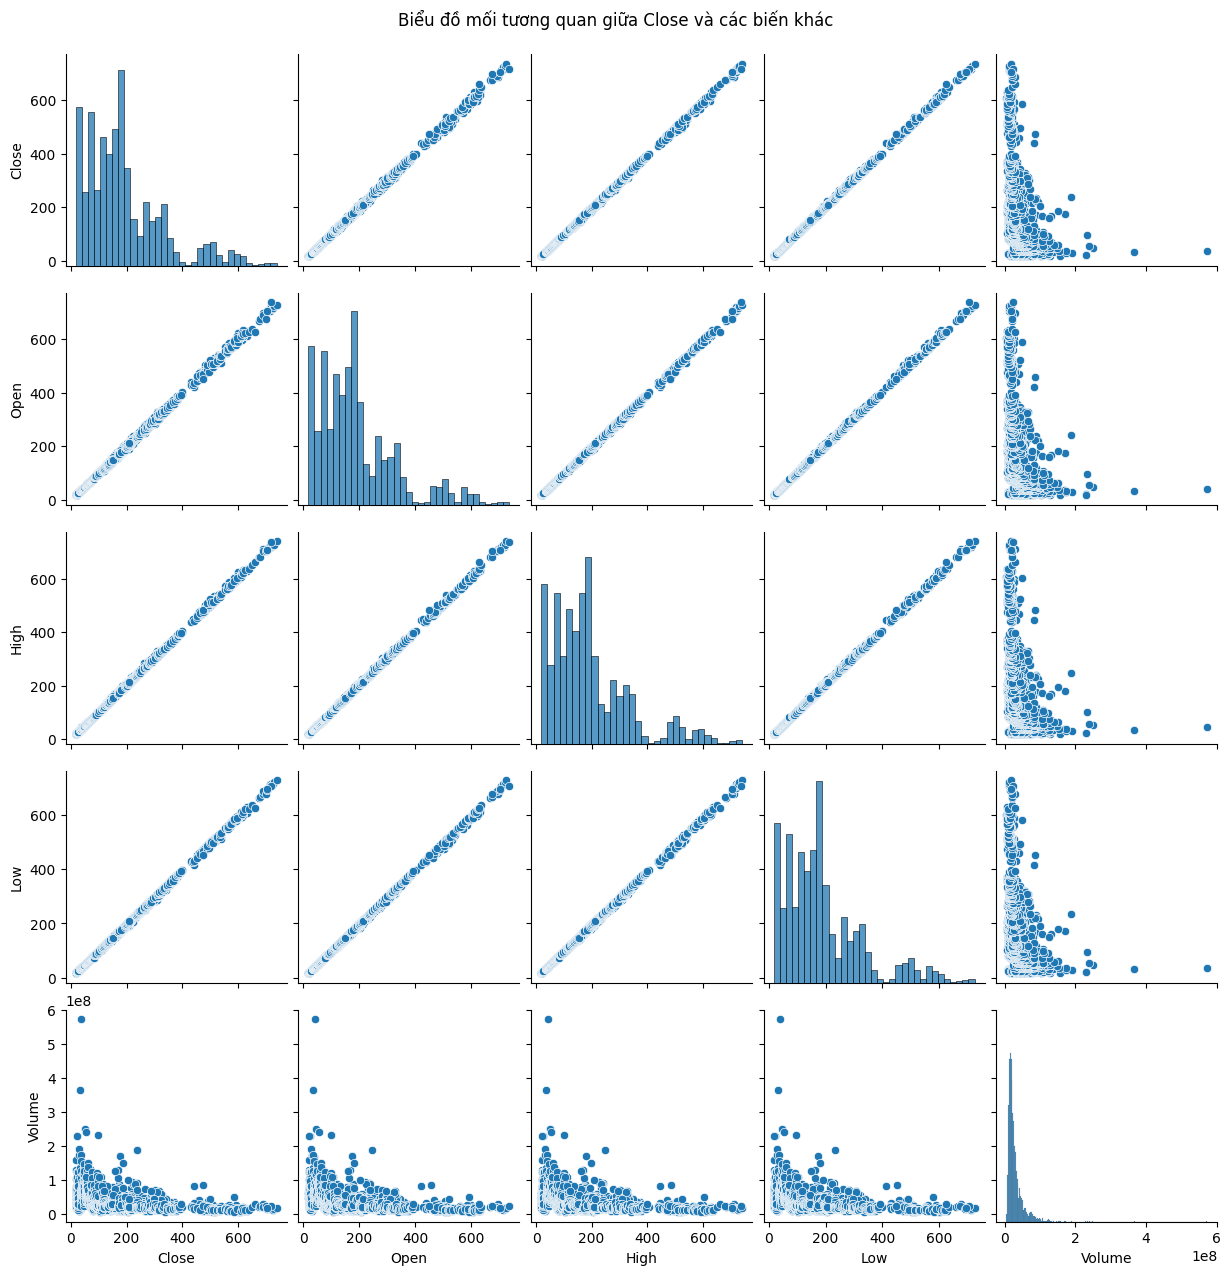


=== Mô hình với tất cả biến ===
R² score: 0.9998497727273373
Hệ số hồi quy (coefficients): [-5.57547826e-01  7.56729397e-01  8.01834017e-01 -3.59447472e-10]
Hệ số chặn (intercept): -0.024131751856543815

=== Mô hình loại bỏ biến Volume ===
R² score: 0.9998497693053906
Hệ số hồi quy (coefficients): [-0.5575519   0.75573691  0.8028812 ]
Hệ số chặn (intercept): -0.03930482163818283


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Đọc dữ liệu
df = pd.read_csv('META.csv')

# --- 1. Vẽ biểu đồ tương quan ---
sns.pairplot(df[['Close', 'Open', 'High', 'Low', 'Volume']])
plt.suptitle("Biểu đồ mối tương quan giữa Close và các biến khác", y=1.02)
plt.show()

# --- 2. Hồi quy với tất cả các biến ---
X_full = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

model_full = LinearRegression()
model_full.fit(X_full, y)
y_pred_full = model_full.predict(X_full)

print("\n=== Mô hình với tất cả biến ===")
print("R² score:", r2_score(y, y_pred_full))
print("Hệ số hồi quy (coefficients):", model_full.coef_)
print("Hệ số chặn (intercept):", model_full.intercept_)

# --- 3. Hồi quy loại bỏ Volume ---
X_novol = df[['Open', 'High', 'Low']]
model_novol = LinearRegression()
model_novol.fit(X_novol, y)
y_pred_novol = model_novol.predict(X_novol)

print("\n=== Mô hình loại bỏ biến Volume ===")
print("R² score:", r2_score(y, y_pred_novol))
print("Hệ số hồi quy (coefficients):", model_novol.coef_)
print("Hệ số chặn (intercept):", model_novol.intercept_)


In [10]:
# Biến độc lập (X) và biến phụ thuộc (Y)
X = df[['Open', 'High', 'Low', 'Volume']]  # biến độc lập
y = df['Close']  # biến phụ thuộc


# Thêm hệ số chặn (constant)
X = sm.add_constant(X)

# Xây dựng mô hình hồi quy
model = sm.OLS(y, X).fit()

# Hiển thị kết quả phân tích hồi quy
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.328e+06
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        16:49:41   Log-Likelihood:                -6230.8
No. Observations:                3207   AIC:                         1.247e+04
Df Residuals:                    3202   BIC:                         1.250e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0241      0.076     -0.319      0.7

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_model(y_true, y_pred, model_name="Mô hình"):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"\n--- {model_name} ---")
    print("R²:", r2)
    print("MAE (Mean Absolute Error):", mae)
    print("MSE (Mean Squared Error):", mse)
    print("RMSE:", rmse)


In [13]:
evaluate_model(y, y_pred_full, model_name="Mô hình có Volume")
evaluate_model(y, y_pred_novol, model_name="Mô hình không có Volume")



--- Mô hình có Volume ---
R²: 0.9998497727273373
MAE (Mean Absolute Error): 1.0668740668253491
MSE (Mean Squared Error): 2.8516021927752657
RMSE: 1.6886687634865714

--- Mô hình không có Volume ---
R²: 0.9998497693053906
MAE (Mean Absolute Error): 1.0668289882774464
MSE (Mean Squared Error): 2.8516671478952347
RMSE: 1.688687996017984


So sánh mô hình có Volume và không có Volume

In [14]:

import statsmodels.api as sm

# Đọc dữ liệu
df = pd.read_csv("META.csv")

# Xử lý NA nếu có
df.dropna(inplace=True)

# Tạo biến X và y cho mô hình đầy đủ
X_full = df[['Open', 'High', 'Low', 'Volume']]
X_full = sm.add_constant(X_full)  # thêm hệ số chặn
y = df['Close']

# Mô hình 1: Gồm cả Volume
model_full = sm.OLS(y, X_full).fit()

# Mô hình 2: Không có Volume
X_reduced = df[['Open', 'High', 'Low']]
X_reduced = sm.add_constant(X_reduced)
model_reduced = sm.OLS(y, X_reduced).fit()

# In kết quả so sánh
print("=== Mô hình 1: Có Volume ===")
print(f"R-squared: {model_full.rsquared:.4f}")
print(f"Adj. R-squared: {model_full.rsquared_adj:.4f}")
print(model_full.summary().tables[1])  # Bảng coef

print("\n=== Mô hình 2: Không có Volume ===")
print(f"R-squared: {model_reduced.rsquared:.4f}")
print(f"Adj. R-squared: {model_reduced.rsquared_adj:.4f}")
print(model_reduced.summary().tables[1])


=== Mô hình 1: Có Volume ===
R-squared: 0.9998
Adj. R-squared: 0.9998
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0241      0.076     -0.319      0.750      -0.173       0.124
Open          -0.5575      0.014    -40.965      0.000      -0.584      -0.531
High           0.7567      0.013     57.655      0.000       0.731       0.782
Low            0.8018      0.013     61.144      0.000       0.776       0.828
Volume     -3.594e-10   1.33e-09     -0.270      0.787   -2.97e-09    2.25e-09

=== Mô hình 2: Không có Volume ===
R-squared: 0.9998
Adj. R-squared: 0.9998
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0393      0.051     -0.774      0.439      -0.139       0.060
Open          -0.5576      0.014    -40.971      0.000      -0.